# 1.0 Case Study: constructing a network of wikipedia pages

## 1.2 Get the Data, Build the Network

In [ ]:
# always check the current version in github
!pip install networkx==2.6.2

In [ ]:
!pip install wikipedia

  Created wheel for wikipedia: filename=wikipedia-1.4.0-py3-none-any.whl size=11696 sha256=f923797178258f910766171f1318605ec69e7c91426d5249bd930f3d5fc59d81
  Stored in directory: /root/.cache/pip/wheels/15/93/6d/5b2c68b8a64c7a7a04947b4ed6d89fb557dcc6bc27d1d7f3ba
Successfully built wikipedia


In [ ]:
from operator import itemgetter
import networkx as nx
import wikipedia

In [ ]:
nx.__version__

'2.6.2'

In [ ]:
#https://en.wikipedia.org/wiki/Data_science
SEED = "Data science".title()
STOPS = ("International Standard Serial Number",
         "International Standard Book Number",
         "National Diet Library",
         "International Standard Name Identifier",
         "International Standard Book Number (Identifier)",
         "Pubmed Identifier", 
         "Pubmed Central",
         "Digital Object Identifier", 
         "Arxiv",
         "Proc Natl Acad Sci Usa", 
         "Bibcode",
         "Library Of Congress Control Number", 
         "Jstor",
         "Doi (Identifier)",
         "Isbn (Identifier)",
         "Pmid (Identifier)",
         "Arxiv (Identifier)",
         "Bibcode (Identifier)")

In [ ]:
todo_lst = [(0, SEED)] # The SEED is in the layer 0
todo_set = set(SEED) # The SEED itself
done_set = set() # Nothing is done yet

In [ ]:
g = nx.DiGraph()
layer, page = todo_lst[0]

It may take a fraction of a second to execute the first five lines of the script.
It may take the whole next year or longer to finish the next twenty lines
because they contain the main collection/construction loop of the project.

In [ ]:
%%time
while layer < 2:
  # Remove the name page of the current page from the todo_lst, 
  # and add it to the set of processed pages. 
  # If the script encounters this page again, it will skip over it.
  del todo_lst[0]
  done_set.add(page)
  
  # Show progress
  print(layer, page) 
  
  # Attempt to download the selected page.
  try:
    wiki = wikipedia.page(page)
  except:
    layer, page = todo_lst[0]
    print("Could not load", page)
    continue
  
  for link in wiki.links:
    link = link.title()
    if link not in STOPS and not link.startswith("List Of"):
      if link not in todo_set and link not in done_set:
        todo_lst.append((layer + 1, link))
        todo_set.add(link)
      g.add_edge(page, link)
  layer, page = todo_lst[0]

0 Data Science
1 American Statistical Association
1 Andrew Gelman
1 Anomaly Detection
1 Artificial Neural Network
1 Association Rule Learning
1 Astronomical Survey
1 Autoencoder
1 Automated Machine Learning
1 Birch
1 Basic Research
1 Bayes' Theorem
1 Bayesian Network
1 Ben Fry
1 Bias–Variance Tradeoff
1 Big Data
1 Boosting (Machine Learning)
1 Bootstrap Aggregating
1 C.F. Jeff Wu
1 Cure Algorithm
1 Canonical Correlation
1 Cluster Analysis
1 Cognitive Computing
1 Columbia University
1 Comet Neowise
1 Committee On Data For Science And Technology
1 Communication
1 Complex Systems
1 Computational Learning Theory
1 Computational Science
1 Computer Science
1 Conditional Random Field
1 Conference On Neural Information Processing Systems
1 Convolutional Neural Network
1 Dbscan
1 Dj Patil
1 Data (Computing)
1 Data Analysis
1 Data Archaeology
1 Data Augmentation
1 Data Cleansing
1 Data Collection
1 Data Compression
1 Data Corruption
1 Data Curation
1 Data Degradation
1 Data Editing
1 Data Extrac

In [ ]:
print("{} nodes, {} edges".format(len(g), nx.number_of_edges(g)))

16933 nodes, 38109 edges


## 1.3 Eliminate Duplicates

In [ ]:
# make a copy of raw graph
original = g.copy()

In [ ]:
# remove self loops
g.remove_edges_from(nx.selfloop_edges(g))

# identify duplicates like that: 'network' and 'networks'
duplicates = [(node, node + "s") 
              for node in g if node + "s" in g
             ]

for dup in duplicates:
  # *dup is a technique named 'unpacking'
  g = nx.contracted_nodes(g, *dup, self_loops=False)

print(duplicates)

duplicates = [(x, y) for x, y in 
              [(node, node.replace("-", " ")) for node in g]
                if x != y and y in g]
print(duplicates)

for dup in duplicates:
  g = nx.contracted_nodes(g, *dup, self_loops=False)

# nx.contracted creates a new node/edge attribute called contraction
# the value of the attribute is a dictionary, but GraphML
# does not support dictionary attributes
nx.set_node_attributes(g, 0,"contraction")
nx.set_edge_attributes(g, 0,"contraction")

[('Artificial Neural Network', 'Artificial Neural Networks'), ('Computer Science', 'Computer Sciences'), ('Convolutional Neural Network', 'Convolutional Neural Networks'), ('Database', 'Databases'), ('Decision Tree', 'Decision Trees'), ('Graphical Model', 'Graphical Models'), ('Hidden Markov Model', 'Hidden Markov Models'), ('Information Science', 'Information Sciences'), ('Perceptron', 'Perceptrons'), ('Random Forest', 'Random Forests'), ('Recurrent Neural Network', 'Recurrent Neural Networks'), ('Statistician', 'Statisticians'), ('Intrusion Detection System', 'Intrusion Detection Systems'), ('Neural Network', 'Neural Networks'), ('Outlier', 'Outliers'), ('Software Bug', 'Software Bugs'), ('Artificial Neuron', 'Artificial Neurons'), ('Brain–Computer Interface', 'Brain–Computer Interfaces'), ('Complex Network', 'Complex Networks'), ('Complex System', 'Complex Systems'), ('Confidence Interval', 'Confidence Intervals'), ('Convolution', 'Convolutions'), ('Coupled Map Lattice', 'Coupled Ma

In [ ]:
print("{} nodes, {} edges".format(len(g), nx.number_of_edges(g)))

16712 nodes, 37932 edges


## 1.4 Truncate the network

In [ ]:
degrees = []
for node, deg in g.degree():
  degrees.append(deg)

In [ ]:
degrees

[228,
 37,
 36,
 275,
 849,
 182,
 94,
 355,
 255,
 186,
 66,
 111,
 227,
 31,
 204,
 309,
 213,
 178,
 37,
 164,
 496,
 646,
 122,
 1242,
 452,
 33,
 693,
 255,
 272,
 534,
 206,
 291,
 365,
 187,
 52,
 200,
 299,
 93,
 199,
 123,
 381,
 677,
 140,
 118,
 124,
 85,
 111,
 88,
 84,
 117,
 186,
 150,
 100,
 194,
 113,
 156,
 115,
 109,
 101,
 136,
 197,
 100,
 226,
 245,
 129,
 206,
 98,
 502,
 129,
 97,
 179,
 111,
 751,
 187,
 13,
 228,
 180,
 462,
 173,
 352,
 17,
 70,
 400,
 41,
 166,
 242,
 180,
 196,
 472,
 166,
 196,
 70,
 282,
 1470,
 205,
 498,
 385,
 216,
 123,
 527,
 219,
 26,
 43,
 294,
 371,
 237,
 174,
 267,
 266,
 25,
 19,
 29,
 163,
 694,
 179,
 219,
 142,
 140,
 677,
 223,
 452,
 567,
 161,
 595,
 273,
 81,
 89,
 436,
 71,
 527,
 62,
 187,
 1,
 26,
 40,
 270,
 128,
 168,
 152,
 188,
 1111,
 284,
 215,
 576,
 165,
 166,
 253,
 199,
 339,
 810,
 454,
 163,
 190,
 191,
 210,
 263,
 528,
 138,
 233,
 469,
 245,
 179,
 302,
 261,
 146,
 177,
 258,
 286,
 158,
 217,
 270,
 17

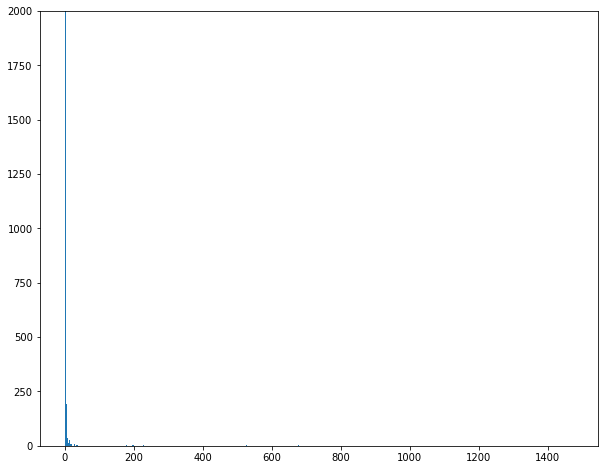

In [ ]:
import seaborn as sns
from collections import Counter
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1,1, figsize=(10,8))
degree_dict = Counter(degrees)
ax.bar(degree_dict.keys(), degree_dict.values())
ax.set_ylim(0,2000)

plt.show()

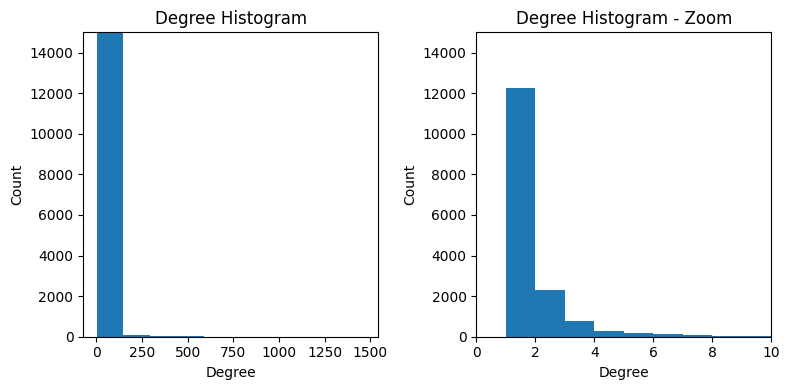

In [ ]:
plt.style.use("default")
# degree sequence
degree_sequence = sorted([d for n, d in g.degree()], reverse=True)  

fig, ax = plt.subplots(1,2,figsize=(8,4))

# all_data has information about degree_sequence and the width of each bin
ax[0].hist(degree_sequence)
ax[1].hist(degree_sequence,bins=[1,2,3,4,5,6,7,8,9,10])

ax[0].set_title("Degree Histogram")
ax[0].set_ylabel("Count")
ax[0].set_xlabel("Degree")
ax[0].set_ylim(0,15000)

ax[1].set_title("Degree Histogram - Zoom")
ax[1].set_ylabel("Count")
ax[1].set_xlabel("Degree")
ax[1].set_xlim(0,10)
ax[1].set_ylim(0,15000)

plt.tight_layout()
plt.show()

In [ ]:
# filter nodes with degree greater than or equal to 2
core = [node for node, deg in dict(g.degree()).items() if deg >= 2]

# select a subgraph with 'core' nodes
gsub = nx.subgraph(g, core)

print("{} nodes, {} edges".format(len(gsub), nx.number_of_edges(gsub)))

nx.write_graphml(gsub, "cna.graphml")

4454 nodes, 25674 edges


In [ ]:
print("Nodes removed: {:.2f}%".format(100*(1 - 3195/13899)))
print("Edges removed: {:.2f}%".format(100*(1 - 13899/24105)))
print("Edges per nodes: {:.2f}".format(13899/3195))

Nodes removed: 77.01%
Edges removed: 42.34%
Edges per nodes: 4.35


As you can see, the following code fragment safely removes 77 percent of the
nodes and 42 percent of the edges, raising the average number of edges per
node to 4.35.

## 1.5 Explore the network

The following figure is a [Gephi](https://gephi.org/) rendering of **gsub**. Node
and label font sizes represent the indegrees (a filter was added in gephi just to show only node with indegree greater than 50). The most in-connected, most significant
nodes are in the upper-left corner of the network. What are they?

<img width="600" src="https://drive.google.com/uc?export=view&id=1Cemnpe6yBttyZ8Vw2i9ifMiWx9psIV7C">


The last code fragment of the exercise efficiently calculates the answer by
calling the method **gsub.in_degree()**. The method (and its sister method **gsub.out_degree()**)
are very similar to **gsub.degree()** except that they report different edge counts in the form of objects InDegreeView and OutDegreeView, respectively.

In [ ]:
top_indegree = sorted(dict(gsub.in_degree()).items(),
                      reverse=True, key=itemgetter(1))[:100]
print("\n".join(map(lambda t: "{} {}".format(*reversed(t)), top_indegree)))
#Lista os 100 primeiros nós da rede com mais links (citações)

111 Data-Mining
98 S2Cid (Identifier)
89 Machine Learning
79 Cluster Analysis
79 Regression Analysis
77 Principal Component Analysis
75 Statistical Classification
75 Artificial Neural Network
74 Issn (Identifier)
72 Linear Discriminant Analysis
72 Logistic Regression
71 Graphical Model
71 Canonical Correlation
71 Linear Regression
70 Factor Analysis
68 Supervised Learning
67 Unsupervised Learning
67 Deep Learning
66 Computational Learning Theory
66 Support-Vector Machine
66 K-Means Clustering
65 Expectation–Maximization Algorithm
65 Machine Learning (Journal)
65 Perceptron
65 Recurrent Neural Network
65 Dimensionality Reduction
64 Self-Organizing Map
64 Anomaly Detection
64 Mean-Shift
64 Q-Learning
64 Bayesian Network
64 Decision Tree Learning
64 Naive Bayes Classifier
64 Independent Component Analysis
64 Random Forest
64 Transformer (Machine Learning Model)
64 State–Action–Reward–State–Action
63 Semi-Supervised Learning
63 Reinforcement Learning
63 Data Augmentation
63 Journal Of Mach